This file contains the code used to generate the joblib and pickle files

In [ ]:
#RANDOM FOREST MODEL & DECISION TREE

import numpy as np
import pandas as pd
from matplotlib.dates import MonthLocator, DateFormatter
import joblib
import pickle 
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor


mytrainingdata = pd.read_csv('train_data_augmented.csv',index_col=0) #added index
mytestdata = pd.read_csv('test_data_augmented.csv',index_col=0) #added index


#The input features
X_train = mytrainingdata.drop(['Max_Demand_GW','Plant_Production_GWh'],axis = 1)
y_train = mytrainingdata['Max_Demand_GW']
y_test = mytestdata['Max_Demand_GW']
X_test = mytestdata.drop(['Max_Demand_GW','Plant_Production_GWh'],axis = 1)


#Instantiate the RF model
model = RandomForestRegressor(n_estimators = 70,bootstrap = False, max_depth = 10, min_samples_leaf = 1, min_samples_split = 2, random_state = 30)

#n_estimators = number of trees
#random_state = random seed for reproducibility

#Fitting the rf model to the training data
fitted_rf = model.fit(X_train.values, y_train.values)



# EXPORT MODEL AS JOBLIB
joblib.dump(model, 'random_forest_model.joblib')

# EXPORT MODEL AS PICKLE
with open('random_forest_model.pkl', 'wb') as file:
    pickle.dump(model, file)


# Create the DT model
regressor = DecisionTreeRegressor(random_state=5,max_depth=13,min_samples_split=2,min_samples_leaf=1)

fitted_regressor = regressor.fit(X_train.values,y_train.values)


# EXPORT MODEL AS JOBLIB
joblib.dump(model, 'decision_tree_model.joblib')

# EXPORT MODEL AS PICKLE
with open('decision_tree_model.pkl', 'wb') as file:
    pickle.dump(regressor, file)


In [5]:
#LINEAR AND POLYNOMIAL REGRESSION MODELS

import csv as csv
import gradio as gradio
import joblib as joblib
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler


training_data = pd.read_csv("train_data.csv", index_col=0)
test_data = pd.read_csv("test_data.csv", index_col=0)

features = ["Plant_Production_GWh", "Population_k", "tmax"]
target = ["Max_Demand_GW"]

# MODEL TRAINING
# The input features
x_train = training_data[features]
y_train = training_data[target]

x_test = test_data[features]
y_test = test_data[target]

# Linear Model
linear_model = LinearRegression()
linear_model.fit(x_train.values, y_train.values)

# Polynomial Model
polynomial_model = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())
polynomial_model.fit(x_train.values, y_train.values)

# EXPORT MODELS AS JOBLIB
joblib.dump(linear_model, "linear_model.joblib")
joblib.dump(polynomial_model, "polynomial_model.joblib")

# Save the model to a file using pickle
with open('linear_model.pkl', 'wb') as file:
    pickle.dump(linear_model, file)
    
    # Save the model to a file using pickle
with open('polynomial_model.pkl', 'wb') as file:
    pickle.dump(polynomial_model, file)

In [11]:
#SVM MODEL

from sklearn.svm import NuSVR

svm_features = ["Plant_Production_GWh","tmax", "Population_k"]
svm_target = ["Max_Demand_GW"]  

feature_ToTrain = training_data[svm_features]
target_ToTrain = training_data[svm_target]

feature_ToTrain = feature_ToTrain.to_numpy()
target_ToTrain = target_ToTrain.to_numpy().ravel()

nu_svr_pipeline = Pipeline([
    ("scaler", StandardScaler()), 
    ("nu_svr", NuSVR(nu=0.5589, C=0.01, degree=2 ,kernel='poly')) 
])

nu_svr_pipeline.fit(feature_ToTrain, target_ToTrain)

# EXPORT MODEL AS JOBLIB
joblib.dump(nu_svr_pipeline, "svm_model.joblib")

# Save the model to a file using pickle
with open('svm_model.pkl', 'wb') as file:
    pickle.dump(nu_svr_pipeline, file)

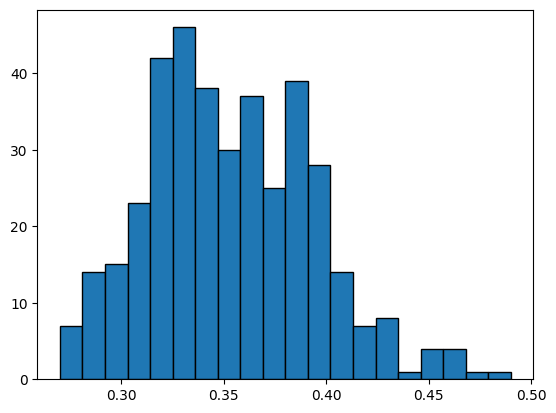

In [22]:
#KNN
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

train_data = pd.read_csv('train_data_augmented.csv')
test_data = pd.read_csv('test_data_augmented.csv')

train_data_prod = train_data['Plant_Production_GWh'] + train_data ['Imports_GWh'] + train_data['Renewables_Production_GWh']
train_data['Grid_Output'] = pd.DataFrame(train_data_prod)
test_data_prod = test_data['Plant_Production_GWh'] + test_data ['Imports_GWh'] + test_data['Renewables_Production_GWh']
test_data['Grid_Output'] = pd.DataFrame(test_data_prod)

counts, bin_edges, _ = plt.hist(train_data['Max_Demand_GW'], bins=20, edgecolor='black')

bin_edges = [-np.inf, 0.330, 0.365, np.inf]


# Create labels for the bins
labels = [i for i in range(len(bin_edges) - 1)]

# Use pd.cut to categorize the data into bins
train_data['Max_Demand_Cat'] = pd.cut(train_data['Max_Demand_GW'], bins=bin_edges, labels=labels, include_lowest=True)
#test_data['Max_Demand_Cat'] = pd.cut(test_data['Max_Demand_GW'], bins=bin_edges, labels=labels, include_lowest=True)

X_train = train_data[['tmax', 'Population_k']]
y_train = train_data['Max_Demand_Cat']
#X_test = test_data[['tmax', 'Population_k']]
#y_test = test_data['Max_Demand_Cat'] 

# Normalize features
scaler = StandardScaler()
X_train_normalized = scaler.fit_transform(X_train)
# Normalize the test set on the same scale the train set was normalized upon
#X_test_normalized = scaler.transform(X_test)


#knn_model = KNeighborsClassifier(n_neighbors=3, weights='uniform', algorithm='ball_tree', p=2, leaf_size=30)
# Create a pipeline with KNN classifier
knn_pipeline = Pipeline([
    ("scaler", StandardScaler()),  # You can remove this line if scaling is not needed
    ("knn", KNeighborsClassifier(n_neighbors=3, weights='uniform', algorithm='ball_tree', p=2, leaf_size=30))
])
knn_pipeline.fit(X_train, y_train)

# EXPORT MODEL AS JOBLIB

joblib.dump(knn_pipeline, "knn_model.joblib")


# Save the model to a file using pickle
with open('knn_model.pkl', 'wb') as file:
    pickle.dump(knn_pipeline, file)


In [ ]:
#GRADIO

import gradio as gr
import joblib
import numpy as np
import csv

# Load pre-trained models
#decision_tree_model = joblib.load('decision_tree_model.joblib')
random_forest_model = joblib.load('random_forest_model.joblib')
linear_regression_model = joblib.load('linear_model.joblib')
polynomial_regression_model = joblib.load('polynomial_model.joblib')
svm_model = joblib.load('svm_model.joblib')
#neural_network_model = joblib.load('neural_network_model.joblib')

# Read examples from CSV
csv_file = 'test_data_augmented.csv'

with open(csv_file, 'r') as file:
    reader = csv.reader(file)
    data_from_csv = [row[3:] for row in reader]

# Add the last column as 'Random Forest' NEED TO CHANGE THIS ONCE OTHER MODELS ARE ADDED
data_with_model_type = [row + ['SVM'] for row in data_from_csv]


# Function to generate prediction
def generate_prediction(imports, renewables_production, powerplants_c02, gdp, population,tmin,tavg,tmax,model_type):
    # Perform prediction using the selected model_type
    if model_type == 'Random Forest':
        model = random_forest_model
    #elif model_type == 'Decision Tree':
    #   model = decision_tree_model
    elif model_type == 'SVM':
        model = svm_model
    elif model_type == 'Linear Regression':
        model = linear_regression_model
    elif model_type == 'Polynomial Regression':
        model = polynomial_regression_model
    #elif model_type == 'Neural Network':
        #model = neural_network_model
    else:
        model = None  # Default
    
    if model is not None:
        input_data = np.array([[imports, renewables_production, powerplants_c02, gdp, population,tmin,tavg,tmax]])
        prediction = model.predict(input_data)[0]
    else:
        prediction = 0  # Default

    # Return the prediction as a number
    return prediction
    

# Gradio interface
iface = gr.Interface(
    fn=generate_prediction,
    inputs=[
        #"number","number", "number", "number", "number", "number", "number", "number",
        gr.Number(label="Imports (GWh)"),
        gr.Number(label="Renewables Production (GWh)"),
        gr.Number(label="Powerplants CO2 Emissions (kt)"),
        gr.Number(label="GDP (mln)"),
        gr.Number(label="Population (k)"),
        gr.Number(label="Min Temperature (°C)"),
        gr.Number(label="Average Temperature (°C)"),
        gr.Number(label="Max Temperature (°C)"),
        gr.Dropdown(choices=['Random Forest','SVM','Linear Regression','Polynomial Regression'], label="Select Model")
    ],
    outputs="number",
    live=True,
    title="Max Demand Prediction",
    description="Enter features and select model to get the predicted Max Demand.",
    examples=data_with_model_type
)

# Launch the Gradio interface
iface.launch(share=True)


# Was attempting to change the inputs displayed based on a dropdown - this was then scrapped in favour of tabs


# Set up a callback to update the interface when the dropdown value changes
iface.set_config(on_change=lambda iface, event: update_interface(iface, event['new']))
# Define callback function to enable/disable inputs based on the selected model
def update_inputs(interface, selected_model):
    # Enable all inputs by default
    for i in range(8):
        iface.components[i].enable()
    
    # Disable specific inputs based on the selected model
    if selected_model == 'SVM':
        iface.components[2].disable()  # Disable third input
        iface.components[3].disable()  # Disable fourth input
        iface.components[4].disable()  # Disable fifth input
        iface.components[5].disable()  # Disable sixth input
        iface.components[7].disable()  # Disable eighth input
    elif selected_model == 'Linear Regression' or selected_model == 'Polynomial Regression':
        iface.components[5].disable()  # Disable sixth input
        iface.components[6].disable()  # Disable seventh input

# Set the callback function for the dropdown input
iface.components[8].observe(update_inputs, names="value")


def update_interface(interface, selected_model):
    # Show/hide the "Imports (GWh)" field based on the selected model
    if selected_model == 'Linear Regression':
        interface.update(inputs=[
            # gr.Number(label="Imports (GWh)"),  # Commenting out or removing this line hides the input
            gr.Number(label="Renewables Production (GWh)"),
            gr.Number(label="Powerplants CO2 Emissions (kt)"),
            gr.Dropdown(choices=['Random Forest', 'SVM', 'Linear Regression', 'Polynomial Regression'], label="Select Model")
        ])
    else:
        interface.update(inputs=[
            gr.Number(label="Imports (GWh)"),
            gr.Number(label="Renewables Production (GWh)"),
            gr.Number(label="Powerplants CO2 Emissions (kt)"),
            gr.Number(label="GDP (mln)"),
            gr.Number(label="Population (k)"),
            gr.Number(label="Min Temperature (°C)"),
            gr.Number(label="Average Temperature (°C)"),
            gr.Number(label="Max Temperature (°C)"),
            gr.Dropdown(choices=['Random Forest', 'SVM', 'Linear Regression', 'Polynomial Regression'], label="Select Model")
        ])


        # Set up a callback to update the interface when the dropdown value changes
# Set up a callback to update the interface when the dropdown value changes
iface.launch(on_change=lambda iface, event: update_interface(iface, event['new']))


- User can choose options from the examples - which are all the test data

- For now outputting max demand as a number instead of a graph. WILL NEED TO ADD THE DATE TO THE EXAMPLES TO BE ABLE TO SHOW THEM ON THE GRAPH. What date would the prediction be? Shall we ask for date input?



Work to do:
    
- CAN SHOW THE OUTPUTS FOR DIFFERENT MODELS UNDER EACH OTHER


- Need the inputs each model works with - e.g. mine needs all features, what do the others need

- Need to get joblibs for each model.

- Finalise interface - add sliders, maybe template, etc

- ADD VALIDATION FOR USER INPUT



import gradio as gr
import joblib
import numpy as np
import csv

# Load pre-trained models
random_forest_model = joblib.load('random_forest_model.joblib')
linear_regression_model = joblib.load('linear_model.joblib')
polynomial_regression_model = joblib.load('polynomial_model.joblib')
svm_model = joblib.load('svm_model.joblib')

# Read examples from CSV
csv_file = 'test_data_augmented.csv'

with open(csv_file, 'r') as file:
    reader = csv.reader(file)
    data_from_csv = [row[3:] for row in reader]

# Add the last column as 'Random Forest'
data_with_model_type = [row + ['SVM'] for row in data_from_csv]

# Function to generate prediction for Random Forest
def generate_random_forest_prediction(imports, renewables_production, powerplants_c02, gdp, population, tmin, tavg, tmax, model_type):
    # Perform prediction using the Random Forest model
    model = random_forest_model
    input_data = np.array([[imports, renewables_production, powerplants_c02, gdp, population, tmin, tavg, tmax]])
    prediction = model.predict(input_data)[0]
    return prediction

# Function to generate prediction for SVM
def generate_svm_prediction(imports, renewables_production, powerplants_c02, gdp, population, tmin, tavg, tmax, model_type):
    # Perform prediction using the SVM model
    model = svm_model
    input_data = np.array([[imports, renewables_production, powerplants_c02, gdp, population, tmin, tavg, tmax]])
    prediction = model.predict(input_data)[0]
    return prediction

# Function to generate prediction for Linear Regression
def generate_linear_regression_prediction(imports, renewables_production, powerplants_c02, gdp, population, tmin, tavg, tmax, model_type):
    # Perform prediction using the Linear Regression model
    model = linear_regression_model
    input_data = np.array([[imports, renewables_production, powerplants_c02, gdp, population, tmin, tavg, tmax]])
    prediction = model.predict(input_data)[0]
    return prediction

# Function to generate prediction for Polynomial Regression
def generate_polynomial_regression_prediction(imports, renewables_production, powerplants_c02, gdp, population, tmin, tavg, tmax, model_type):
    # Perform prediction using the Polynomial Regression model
    model = polynomial_regression_model
    input_data = np.array([[imports, renewables_production, powerplants_c02, gdp, population, tmin, tavg, tmax]])
    prediction = model.predict(input_data)[0]
    return prediction

# Gradio interface
iface = gr.Interface(
    fn=generate_random_forest_prediction,
    inputs=[
        gr.Number(label="Imports (GWh)"),
        gr.Number(label="Renewables Production (GWh)"),
        gr.Number(label="Powerplants CO2 Emissions (kt)"),
        gr.Number(label="GDP (mln)"),
        gr.Number(label="Population (k)"),
        gr.Number(label="Min Temperature (°C)"),
        gr.Number(label="Average Temperature (°C)"),
        gr.Number(label="Max Temperature (°C)"),
    ],
    outputs="number",
    live=True,
    title="Random Forest Prediction",
    description="Enter features to get the predicted Max Demand.",
    examples=data_with_model_type
)

# Set up a callback to update the interface when the dropdown value changes
def update_interface(interface, event):
    model_type = event['new']
    if model_type == 'Random Forest':
        interface.update(fn=generate_random_forest_prediction)
    elif model_type == 'SVM':
        interface.update(fn=generate_svm_prediction)
    elif model_type == 'Linear Regression':
        interface.update(fn=generate_linear_regression_prediction)
    elif model_type == 'Polynomial Regression':
        interface.update(fn=generate_polynomial_regression_prediction)

# Set up a callback to update the interface when the dropdown value changes
iface.launch(on_change=lambda iface, event: update_interface(iface, event))
